# Imports

In [1]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

# Part A - 30 Marks

## 1. Data Understanding & Exploration: [5 Marks]

### A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [2]:
df1 = pd.read_csv("Car name.csv")
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [3]:
df1.shape

(398, 1)

### B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark]

In [4]:
df2 = pd.read_json("Car-Attributes.json")
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
df2.shape

(398, 8)

### C. Merge both the DataFrames together to form a single DataFrame [2 Mark]

In [6]:
df = df1.join(df2)
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
df.shape

(398, 9)

### D. Print 5 point summary of the numerical features and share insights. [1 Marks]

In [8]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### Insights:


## 2. Data Preparation & Analysis: [10 Marks]

### A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. [2 Mark]

In [9]:
for i in df.columns:
    print("Percentage of missing values in", i, "-", df[i].isna().sum()/len(df[i])*100, "%")

Percentage of missing values in car_name - 0.0 %
Percentage of missing values in mpg - 0.0 %
Percentage of missing values in cyl - 0.0 %
Percentage of missing values in disp - 0.0 %
Percentage of missing values in hp - 0.0 %
Percentage of missing values in wt - 0.0 %
Percentage of missing values in acc - 0.0 %
Percentage of missing values in yr - 0.0 %
Percentage of missing values in origin - 0.0 %


No null values. We will check for unexpected values later in the script.

### B. Check for duplicate values in the data and impute with the best suitable approach. [1 Mark]

In [10]:
df.duplicated().sum()

0

No duplicate rows. There are duplications in the "car_name" feature though, but as it is just filled with names it should be removed before we step into modelling.

### C. Plot a pairplot for all features. [1 Marks]

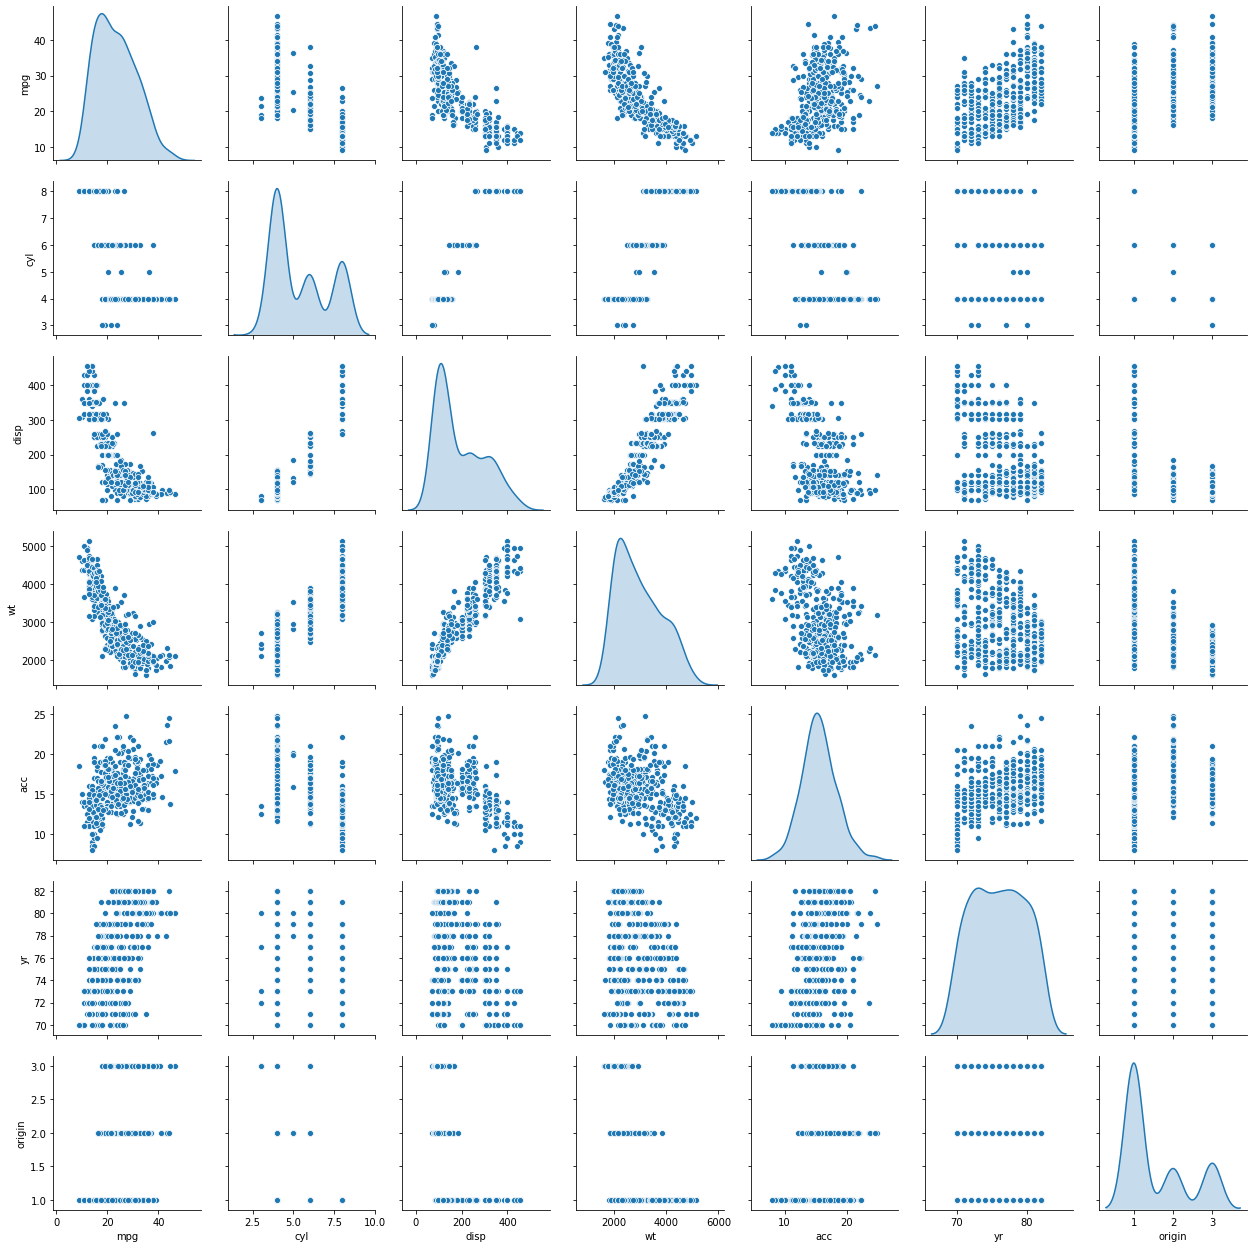

In [11]:
sns.pairplot(df, diag_kind='kde')
plt.show()

### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

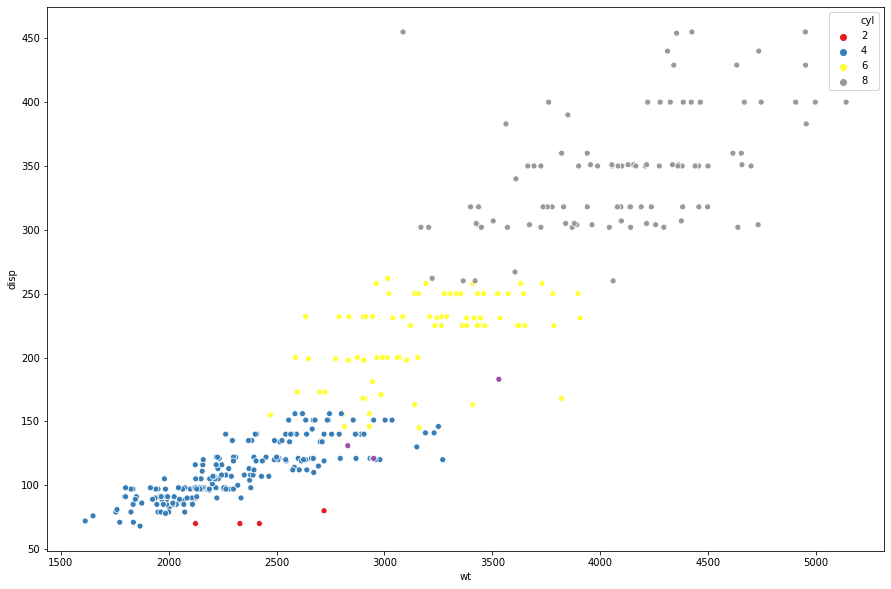

In [12]:
plt.figure(figsize=(15,10))
sns.scatterplot(df['wt'],df['disp'],hue=df['cyl'], palette='Set1')
plt.show()

### E. Share insights for Q2.d. [1 Marks]

1. As the weight of the vehicle increase the displacement also increases.
2. The vehicles with high number of cylinders usually have high number of cylinders.
3. As the number of cylinders increase the displacement of those vehicles also increase.

### F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

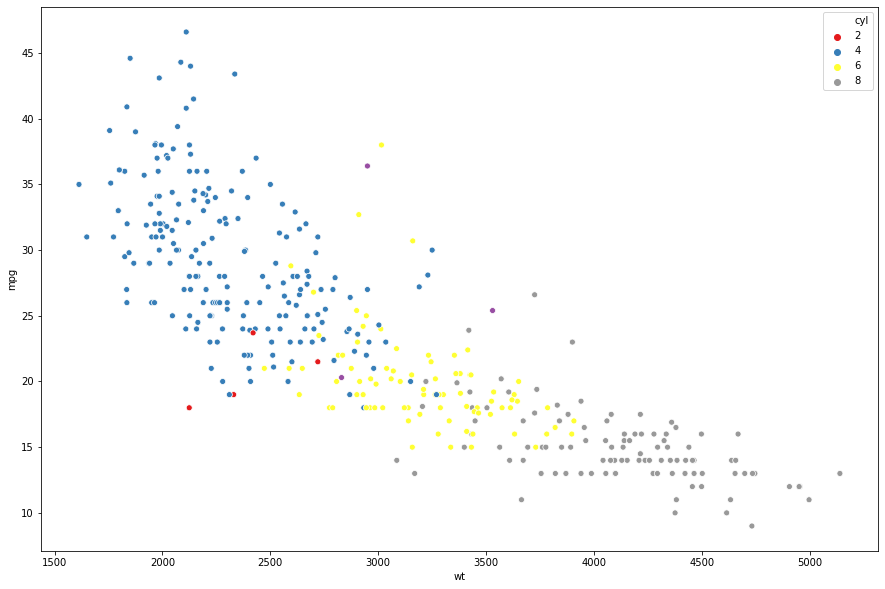

In [13]:
plt.figure(figsize=(15,10))
sns.scatterplot(df['wt'],df['mpg'],hue=df['cyl'], palette='Set1')
plt.show()

### G. Share insights for Q2.f. [1 Marks]

1. As the wight of a vehicle increases the mileage decreases.
2. The highest mileage is given by 4 cylinder engines and the lowest mileage by 8 cylinder engines.
3. The 8 cylinder engine vehicles have higher weights ans compared to their lower cylinder counter-parts.

### H. Check for unexpected values in all the features and datapoints with such values. [2 Marks]

In [14]:
for i in df.columns:
    if df[i].isin([' ','?','-']).sum()>0:
        print(i,"- True")
    else:
        print(i,"- False")

car_name - False
mpg - False
cyl - False
disp - False
hp - True
wt - False
acc - False
yr - False
origin - False


Only hp has unexpected values

In [15]:
df['hp'].isin(['?']).sum()

6

In [16]:
df['hp'] = df['hp'].replace('?', np.nan)
df['hp'] = df['hp'].fillna(df['hp'].median())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
car_name    398 non-null object
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


## 3. Clustering: [15 Marks]

### A. Apply K-Means clustering for 2 to 10 clusters. [3 Marks]

#### Scaling the Data

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
dfs = ss.fit_transform(df.iloc[:,1:])
dfs = pd.DataFrame(dfs, columns=df.drop('car_name', axis=1).columns)
dfs.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145


#### Applying K-Means

In [19]:
clusters = range(2,11)
wss = []

for k in clusters:
    km = KMeans(k)
    km.fit(dfs)
    wss.append(km.inertia_)

### B. Plot a visual and find elbow point. [2 Marks]

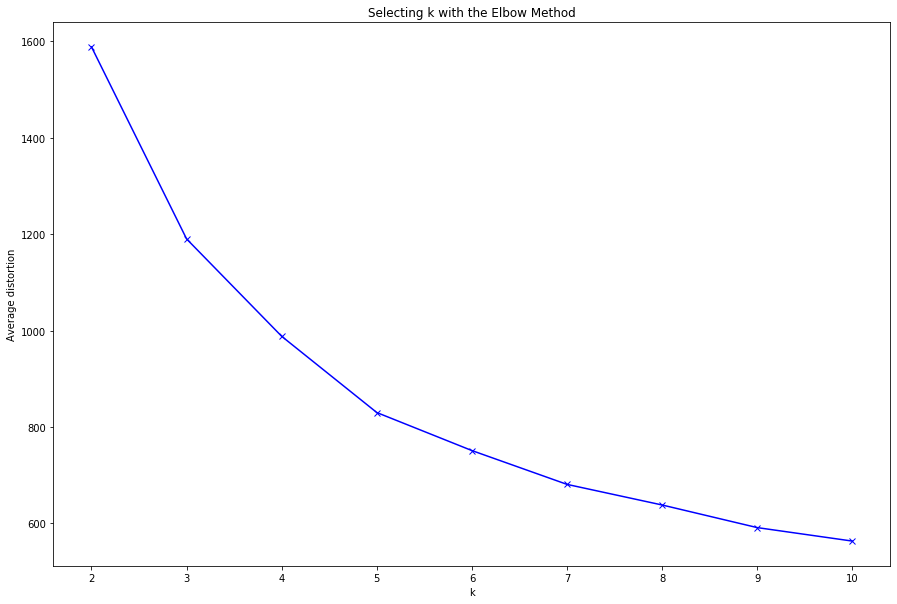

In [20]:
plt.figure(figsize=(15,10))
plt.plot(clusters, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

### C. On the above visual, highlight which are the possible Elbow points. [1 Marks]

The clusters seem to diverge at k= 3 or 5. We should try our model with 5 clusters as earlier even the pairplot had shown atleast 3 clusters in the data.

### D. Train a K-means clustering model once again on the optimal number of clusters. [3 Marks]

In [21]:
km = KMeans(n_clusters = 5)
km.fit(dfs)
km.inertia_

829.7823888842504

In [22]:
labels = km.labels_

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(dfs,labels)

0.3334851925527616

### E. Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks]

In [24]:
df['Label'] = labels
dfs['Label'] = labels

df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Label
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,0


In [25]:
df['Label'].value_counts()

0    95
1    84
4    80
3    72
2    67
Name: Label, dtype: int64

In [26]:
dfs['Label'].value_counts()

0    95
1    84
4    80
3    72
2    67
Name: Label, dtype: int64

### F. Plot a visual and color the datapoints based upon clusters. [2 Marks]

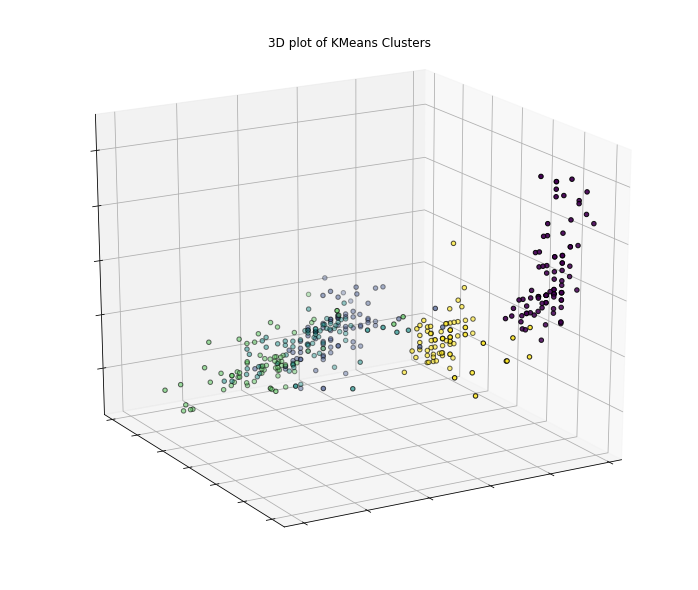

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)

ax.scatter(dfs.iloc[:, 0], dfs.iloc[:, 1], dfs.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_title('3D plot of KMeans Clusters')
plt.show()

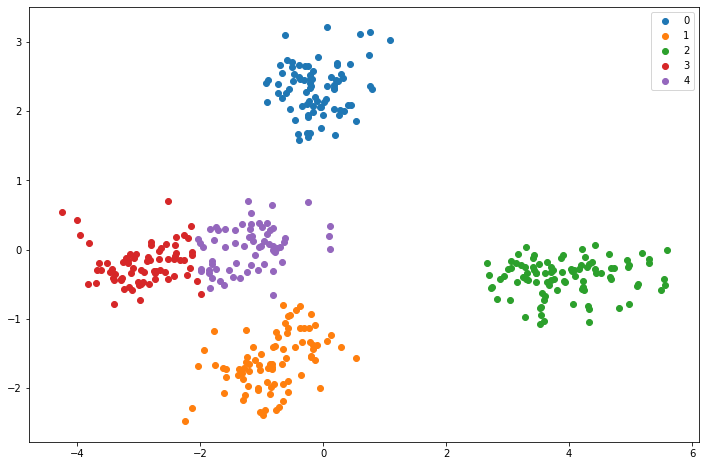

In [28]:
from sklearn.decomposition import PCA

plt.figure(figsize=(12,8))
pca = PCA(2)

df = pca.fit_transform(dfs)
 
kmeans = KMeans(n_clusters= 5)
 
label = kmeans.fit_predict(df)
 
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

### G. Pass a new DataPoint and predict which cluster it belongs to. [2 Marks]

In [29]:
datapoint = pd.DataFrame({"x1":[0.5], "x2":[0.5], "x3":[0.5], "x4":[0.5], "x5":[0.5], "x6":[0.5], "x7":[0.5], "x8":[0.5]})

In [30]:
predict = km.predict(datapoint)
print("The datapoint lies in the label:",predict)

The datapoint lies in the label: [4]


# Part B - 30 Marks

## 1. Data Understanding & Cleaning: [5 Marks]

### A. Read ‘vehicle.csv’ and save as DataFrame. [1 Marks]

In [31]:
df = pd.read_csv("vehicle.csv")
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### B. Check percentage of missing values and impute with correct approach. [1 Marks]

In [32]:
for i in df.columns:
    print("Percentage of missing values in", i, "-", round(df[i].isna().sum()/len(df[i])*100, 2),"%")

Percentage of missing values in compactness - 0.0 %
Percentage of missing values in circularity - 0.59 %
Percentage of missing values in distance_circularity - 0.47 %
Percentage of missing values in radius_ratio - 0.71 %
Percentage of missing values in pr.axis_aspect_ratio - 0.24 %
Percentage of missing values in max.length_aspect_ratio - 0.0 %
Percentage of missing values in scatter_ratio - 0.12 %
Percentage of missing values in elongatedness - 0.12 %
Percentage of missing values in pr.axis_rectangularity - 0.35 %
Percentage of missing values in max.length_rectangularity - 0.0 %
Percentage of missing values in scaled_variance - 0.35 %
Percentage of missing values in scaled_variance.1 - 0.24 %
Percentage of missing values in scaled_radius_of_gyration - 0.24 %
Percentage of missing values in scaled_radius_of_gyration.1 - 0.47 %
Percentage of missing values in skewness_about - 0.71 %
Percentage of missing values in skewness_about.1 - 0.12 %
Percentage of missing values in skewness_about.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

#### Imputing the Nulls with Median

In [34]:
for i in df.columns:
    if df[i].isna().sum()/len(df[i])>0.00:
        df[i].fillna(df[i].median(), inplace=True)

In [35]:
for i in df.columns:
    print("Percentage of missing values in", i, "-", round(df[i].isna().sum()/len(df[i])*100, 2),"%")

Percentage of missing values in compactness - 0.0 %
Percentage of missing values in circularity - 0.0 %
Percentage of missing values in distance_circularity - 0.0 %
Percentage of missing values in radius_ratio - 0.0 %
Percentage of missing values in pr.axis_aspect_ratio - 0.0 %
Percentage of missing values in max.length_aspect_ratio - 0.0 %
Percentage of missing values in scatter_ratio - 0.0 %
Percentage of missing values in elongatedness - 0.0 %
Percentage of missing values in pr.axis_rectangularity - 0.0 %
Percentage of missing values in max.length_rectangularity - 0.0 %
Percentage of missing values in scaled_variance - 0.0 %
Percentage of missing values in scaled_variance.1 - 0.0 %
Percentage of missing values in scaled_radius_of_gyration - 0.0 %
Percentage of missing values in scaled_radius_of_gyration.1 - 0.0 %
Percentage of missing values in skewness_about - 0.0 %
Percentage of missing values in skewness_about.1 - 0.0 %
Percentage of missing values in skewness_about.2 - 0.0 %
Per

### C. Visualize a Pie-chart and print percentage of values for variable ‘class’. [2 Marks]

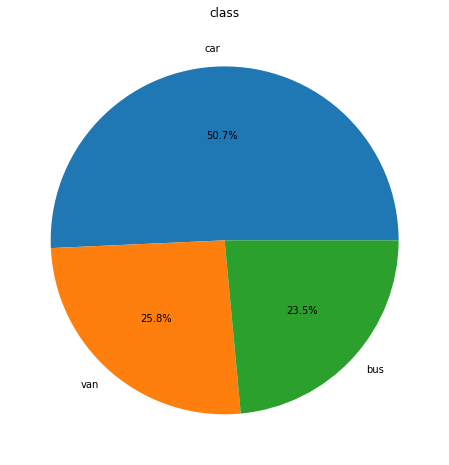

In [36]:
plt.figure(figsize=(8,8))
plt.pie(df['class'].value_counts(), 
        autopct='%1.1f%%',
        labels=set(df['class']))
plt.title("class")
plt.show()

### D. Check for duplicate rows in the data and impute with correct approach. [1 Marks]

In [37]:
df.duplicated().any()

False

There are no duplicate rows in the DataFrame.

## 2. Data Preparation: [2 Marks]

### A. Split data into X and Y. [Train and Test optional] [1 Marks]

In [38]:
X = df.drop('class', axis=1)
y = df['class']

### B. Standardize the Data. [1 Marks]

In [39]:
ss = StandardScaler()
Xs = ss.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)
Xs.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


## 3. Model Building: [13 Marks]

### A. Train a base Classification model using SVM. [1 Marks]

In [40]:
from sklearn.svm import SVC 

sv = SVC()
sv.fit(Xs, y)

pred = sv.predict(Xs)

### B. Print Classification metrics for train data. [1 Marks]

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y, pred))

              precision    recall  f1-score   support

         bus       0.99      0.98      0.98       218
         car       0.99      0.98      0.99       429
         van       0.95      0.98      0.97       199

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846



### C. Apply PCA on the data with 10 components. [3 Marks]

In [42]:
pca = PCA(n_components=10)
pca.fit(Xs)

PCA(n_components=10)

In [43]:
print(pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


In [45]:
print(pca.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


### D. Visualize Cumulative Variance Explained with Number of Components. [2 Marks]

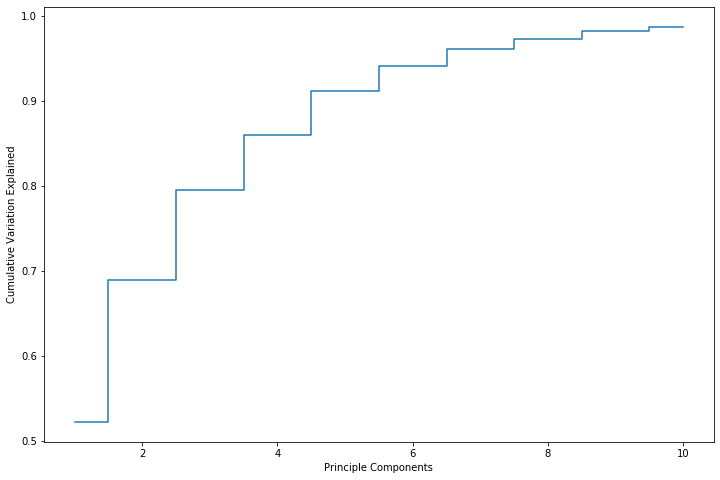

In [46]:
plt.figure(figsize=(12,8))
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumulative Variation Explained')
plt.xlabel('Principle Components')
plt.show()

### E. Draw a horizontal line on the above plot to highlight the threshold of 90%. [1 Marks]

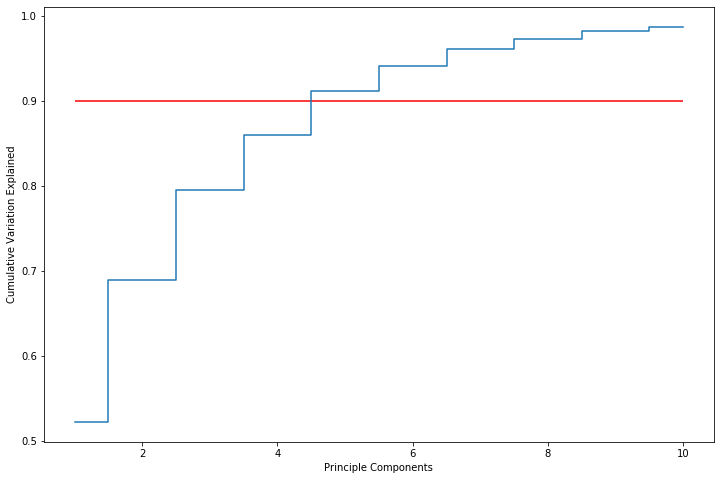

In [47]:
plt.figure(figsize=(12,8))
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.hlines(0.9,1,10, colors='r')
plt.ylabel('Cumulative Variation Explained')
plt.xlabel('Principle Components')
plt.show()

### F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. [2 Marks]

In [48]:
pca1 = PCA(n_components=5)
pca1.fit(Xs)

PCA(n_components=5)

In [49]:
print(pca1.explained_variance_)
print(pca1.explained_variance_ratio_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063]
[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869]


### G. Train SVM model on components selected from above step. [1 Marks]

In [50]:
Xpca1 = pca1.transform(Xs)

sv1 = SVC()
sv1.fit(Xpca1, y)

pred1 = sv1.predict(Xpca1)

### H. Print Classification metrics for train data of above model and share insights. [2 Marks]

In [51]:
print(classification_report(y, pred1))

              precision    recall  f1-score   support

         bus       0.86      0.68      0.76       218
         car       0.84      0.89      0.87       429
         van       0.70      0.76      0.73       199

    accuracy                           0.81       846
   macro avg       0.80      0.78      0.78       846
weighted avg       0.81      0.81      0.81       846



#### Insights

1. The Recall for 'bus' values seem to be low, meaning the model is a little biased while classifying 'bus' values.
2. The results are for in-sample data, so we can detect a bit of overfitting here, perhaps an out of sample report will give better intuition.

## 4. Performance Improvement: [5 Marks]

### A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. [2 Marks]

In [52]:
pca2 = PCA(n_components=5)
pca2.fit(Xs)

PCA(n_components=5)

In [53]:
Xpca2 = pca2.transform(Xs)

sv2 = SVC()
sv2.fit(Xpca2, y)

sv2.score(Xpca2, y)

0.8073286052009456

Tuning the parameters:

In [54]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(Xpca2, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.547, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.562, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.568, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.550, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.729, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.734, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.680, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.512, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.509, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.509, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.503, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.509, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.515, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.509, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.503, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.509, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.782, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.775, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.769, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.1s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [55]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [56]:
sv3 = SVC(C= 10, gamma= 0.1, kernel= 'rbf')
sv3.fit(Xpca2, y)

sv3.score(Xpca2, y)

0.8900709219858156

The score of our model increased from 80% to 89%

### B. Share best Parameters observed from above step. [1 Marks]

In [57]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


### C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights. [2 Marks]

In [58]:
pred3 = sv3.predict(Xpca2)
print('\033[1m'+"The Classification report of the model after tuning:"+'\033[0m')
print(classification_report(y, pred3))

The Classification report of the model after tuning:
              precision    recall  f1-score   support

         bus       0.87      0.86      0.87       218
         car       0.91      0.93      0.92       429
         van       0.85      0.83      0.84       199

    accuracy                           0.89       846
   macro avg       0.88      0.87      0.88       846
weighted avg       0.89      0.89      0.89       846



In [59]:
print('\033[1m'+"The Classification report of the model before tuning:"+'\033[0m')
print(classification_report(y, pred1))

The Classification report of the model before tuning:
              precision    recall  f1-score   support

         bus       0.86      0.68      0.76       218
         car       0.84      0.89      0.87       429
         van       0.70      0.76      0.73       199

    accuracy                           0.81       846
   macro avg       0.80      0.78      0.78       846
weighted avg       0.81      0.81      0.81       846



#### Insights:

1. The Recall of the model along with accuracy and F1 score has increased signinficantly.
2. This shows the model is now able to predict better for all the three classes.
3. The scores would be even better if we had splitted the data into test and train, as the metrics is only showing in-sample results.

## 5. Data Understanding & Cleaning: [5 Marks]

### A. Explain pre-requisite/assumptions of PCA. [2 Marks]

There are some assumptions in PCA which are to be followed as they will lead to accurate functioning of this dimensionality reduction technique in ML. The assumptions in PCA are:

    •There must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves.

    •PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise.

    •All variables should be accessed on the same ratio level of measurement.

    •Extreme values that deviate from other data points in any dataset, which are also called outliers, should be less. More number of outliers will represent experimental errors and will degrade your ML model/algorithm.

    •The feature set must be correlated and the reduced feature set after applying PCA will represent the original data set but in an effective way with fewer dimensions.

### B. Explain advantages and limitations of PCA. [3 Marks]

Advantages of Principal Component Analysis
1. Removes Correlated Features
2. Improves Algorithm Performance
3. Reduces Overfitting
4. Improves Visualization

Limitations of Principal Component Analysis
1. Independent variables become less interpretable
2. Data standardization is must before PCA
3. Information Loss can be seen